In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import anndata 


In [17]:
def describe(array):

    print(f'MEAN: {np.mean(array):.5f}')
    print(f'MEDIAN: {np.median(array):.5f}')
    print(f'MAX: {np.max(array):.5f}')
    print(f'MIN: {np.min(array):.5f}')
    print(f'ST: {np.std(array):.5f}')

# Purpose:

Investigate the AUROC for:

data/EGAD/EGAD.csv

data/EGAD/EGAD_sum.csv

## EGAD.csv

In [18]:
EGAD = pd.read_csv('../../data/EAGD/EGAD_avg.csv', index_col=0 , header = 0)

In [19]:
def describe(array):
    print(f'MEAN: {np.mean(array)}')
    print(f'MEDIAN: {np.median(array)}')
    print(f'MAX: {np.max(array)}')
    print(f'MIN: {np.min(array)}')

def describe_no_zeros(array):
    array = array[array!=0]
    print(f'MEAN: {np.mean(array)}')
    print(f'MEDIAN: {np.median(array)}')
    print(f'MAX: {np.max(array)}')
    print(f'MIN: {np.min(array)}')

### Investingating auc values

In [20]:
auc = EGAD.loc[:,'auc']

In [21]:
NAs = auc.loc[auc.isna()]

In [22]:
NAs

GO:0043610   NaN
GO:0072522   NaN
GO:0048584   NaN
GO:0051961   NaN
GO:0051494   NaN
              ..
GO:0042078   NaN
GO:0090220   NaN
GO:0090172   NaN
GO:0070478   NaN
GO:0042773   NaN
Name: auc, Length: 71, dtype: float64

### There are 71 nan auc values??

In [23]:
EGAD.loc[NAs.index]

,auc,avg_node_degree,degree_null_auc
GO:0043610,NaN,NaN,NaN
GO:0072522,NaN,NaN,NaN
GO:0048584,NaN,NaN,NaN
GO:0051961,NaN,NaN,NaN
GO:0051494,NaN,NaN,NaN
...,...,...,...
GO:0042078,NaN,NaN,NaN
GO:0090220,NaN,NaN,NaN
GO:0090172,NaN,NaN,NaN
GO:0070478,NaN,NaN,NaN


# Plotting AUCs

Text(0, 0.5, 'Number of GO Terms in bins')

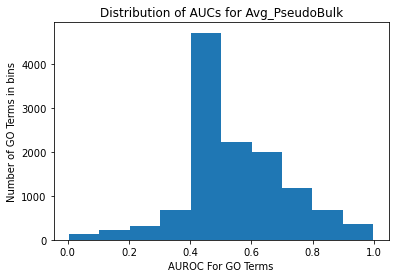

In [24]:
plt.hist(auc)
plt.title("Distribution of AUCs for Avg_PseudoBulk")
plt.xlabel('AUROC For GO Terms')
plt.ylabel('Number of GO Terms in bins')

# Investigating high AUCs

In [25]:
High = EGAD.loc[EGAD.loc[:,'auc'] > 0.8]


In [26]:
High.columns

Index(['auc', 'avg_node_degree', 'degree_null_auc'], dtype='object')

In [27]:
High.sort_values(by = 'auc', axis = 0, ascending=False)

,auc,avg_node_degree,degree_null_auc
GO:0070476,0.997992,1.521736,0.009455
GO:0030573,0.996838,9.090693,0.044741
GO:0060621,0.996600,-4.832343,0.047605
GO:0008315,0.995466,-2.246772,0.050468
GO:0055090,0.995188,17.480989,0.083130
...,...,...,...
GO:0060333,0.800230,2.659137,0.384976
GO:0002431,0.800155,-325.874269,0.890652
GO:0035791,0.800139,150.458441,0.714773
GO:0060025,0.800084,68.318998,0.276578


In [28]:
High

,auc,avg_node_degree,degree_null_auc
GO:0045143,0.817630,-75.182360,0.336446
GO:0042178,0.806082,46.251145,0.331943
GO:0050911,0.821821,-17.499809,0.269663
GO:0031424,0.830815,-4.573750,0.257772
GO:0061966,0.986197,23.023765,0.279511
...,...,...,...
GO:0110032,0.860140,168.505082,0.583960
GO:0010142,0.890413,71.981563,0.298276
GO:0010312,0.949214,18.124995,0.123218
GO:0002397,0.957347,-29.951724,0.139325


# sum_EGAD.csv

In [30]:
sum_EGAD = pd.read_csv('../../data/EAGD/EGAD_sum.csv', index_col=0 , header = 0)

In [31]:
sum_auc = sum_EGAD.loc[:,'auc']

In [32]:
sum_NAs = sum_auc.loc[sum_auc.isna()]

In [33]:
sum_NAs

GO:0043610   NaN
GO:0072522   NaN
GO:0048584   NaN
GO:0051961   NaN
GO:0051494   NaN
              ..
GO:0042078   NaN
GO:0090220   NaN
GO:0090172   NaN
GO:0070478   NaN
GO:0042773   NaN
Name: auc, Length: 71, dtype: float64

### Plotting sum_auc

Text(0, 0.5, 'Number of GO Terms in bins')

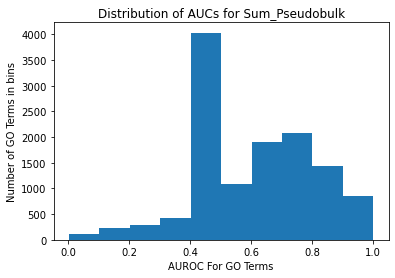

In [34]:
plt.hist(sum_auc)
plt.title("Distribution of AUCs for Sum_Pseudobulk")
plt.xlabel('AUROC For GO Terms')
plt.ylabel('Number of GO Terms in bins')

# Bulk Expression

In [37]:
bulk_EGAD = pd.read_csv('../../data/EAGD/EGAD_bulk.csv', index_col=0 , header = 0)

In [38]:
bulk_EGAD

,auc,avg_node_degree,degree_null_auc
GO:0002250,0.799935,494.519817,0.238547
GO:0045087,0.670182,893.203658,0.379591
GO:0071918,0.823148,76.504642,0.144572
GO:0006955,0.754855,536.131997,0.249467
GO:0050830,0.721034,501.303302,0.290244
...,...,...,...
GO:1902983,NaN,NaN,NaN
GO:0033316,0.500000,1424.382744,0.466725
GO:0031445,NaN,NaN,NaN
GO:0031282,0.500000,2858.328857,0.909190


In [39]:
bulk_auc = bulk_EGAD.loc[:,'auc']

In [40]:
NAs = auc.loc[auc.isna()]
NAs

GO:0043610   NaN
GO:0072522   NaN
GO:0048584   NaN
GO:0051961   NaN
GO:0051494   NaN
              ..
GO:0042078   NaN
GO:0090220   NaN
GO:0090172   NaN
GO:0070478   NaN
GO:0042773   NaN
Name: auc, Length: 71, dtype: float64

### 71 nan aucs again

# Plotting bulk aucs

Text(0, 0.5, 'Number of GO Terms in bins')

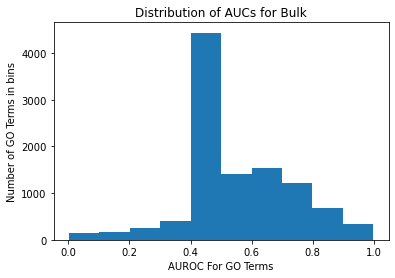

In [41]:
plt.hist(bulk_auc)
plt.title("Distribution of AUCs for Bulk")
plt.xlabel('AUROC For GO Terms')
plt.ylabel('Number of GO Terms in bins')

# PC EGAD Exploration

In [42]:
bulk_pc = pd.read_csv("../../data/EAGD/EGAD_bulk_pc.csv")
sum_pc = pd.read_csv("../../data/EAGD/EGAD_sum_pc.csv")
avg_pc = pd.read_csv("../../data/EAGD/EGAD_avg_pc.csv")

### Bulk and Sum


In [43]:
# Bulk and Sum
round(bulk_pc.loc[:,"auc"].corr(sum_pc.loc[:,"auc"]),2)


0.35

In [44]:
describe(bulk_pc.loc[:,'auc'])

MEAN: 0.6109585263751964
MEDIAN: nan
MAX: 0.936849574266793
MIN: 0.235442538931599


Text(0.5, 1.0, 'Correlation Between Sum and Bulk EGAD AUCs')

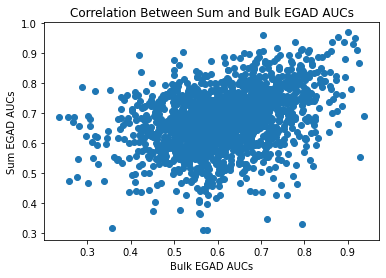

In [45]:
plt.scatter(bulk_pc.loc[:,"auc"],sum_pc.loc[:,"auc"])
plt.ylabel("Sum EGAD AUCs")
plt.xlabel("Bulk EGAD AUCs")
plt.title("Correlation Between Sum and Bulk EGAD AUCs")

### Bulk and Avg

In [46]:
# bulk and avg
round(bulk_pc.loc[:,"auc"].corr(avg_pc.loc[:,"auc"]),2)

0.47

Text(0.5, 1.0, 'Correlation Between AVG and BULK EGAD AUCs')

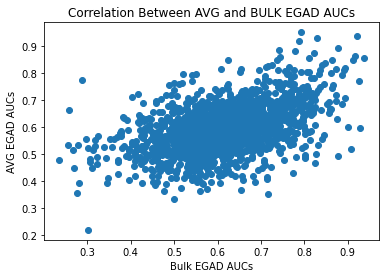

In [47]:
plt.scatter(bulk_pc.loc[:,"auc"],avg_pc.loc[:,"auc"])
plt.ylabel("AVG EGAD AUCs")
plt.xlabel("Bulk EGAD AUCs")
plt.title("Correlation Between AVG and BULK EGAD AUCs")

### Sum and Avg

In [48]:
round(sum_pc.loc[:,"auc"].corr(avg_pc.loc[:,"auc"]),2)

0.52

Text(0.5, 1.0, 'Correlation Between Avg and Sum EGAD AUCs')

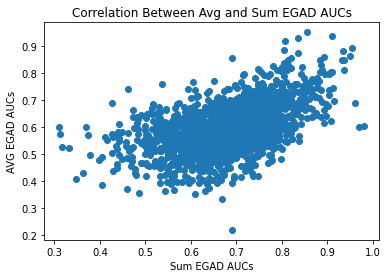

In [49]:
plt.scatter(sum_pc.loc[:,"auc"],avg_pc.loc[:,"auc"])
plt.ylabel("AVG EGAD AUCs")
plt.xlabel("Sum EGAD AUCs")
plt.title("Correlation Between Avg and Sum EGAD AUCs")

# Investingating AURUC With Equal OP groups

In [50]:
bulk_pc = pd.read_csv("../../data/EAGD/EGAD_bulk_pc_OPfiltered.csv")
sum_pc = pd.read_csv("../../data/EAGD/EGAD_sum_pc_OPfiltered.csv")

In [51]:
### Bulk and Sum
round(bulk_pc.loc[:,"auc"].corr(sum_pc.loc[:,"auc"]),2)


0.4

Text(0.5, 1.0, 'Sum and Bulk EGAD AUCs with Equal OPs')

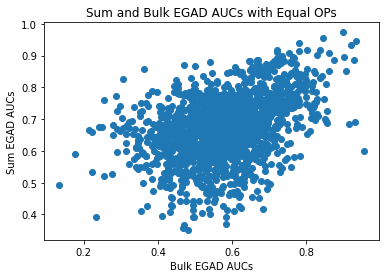

In [52]:
plt.scatter(bulk_pc.loc[:,"auc"],sum_pc.loc[:,"auc"])
plt.ylabel("Sum EGAD AUCs")
plt.xlabel("Bulk EGAD AUCs")
plt.title("Sum and Bulk EGAD AUCs with Equal OPs")

In [56]:
describe(bulk_pc.loc[:,'auc'].round(2))

MEAN: 0.5762630966239813
MEDIAN: nan
MAX: 0.96
MIN: 0.13


In [57]:
describe(sum_pc.loc[:,'auc'].round(2))

MEAN: 0.6688953488372092
MEDIAN: 0.67
MAX: 0.97
MIN: 0.35
